# Application Question

The demo data set for this part is the Wesenheit index of the OGLE-III fundamental-mode and first overtone classical Cepheids. 

These stars are awesome because you can use them to measure distances. Here's a nice [youtube video](https://www.youtube.com/watch?v=iyisAjHdhas) on these stars.

You'll try to estimate their period-luminosity relationship. 

The Wesenheit index is defined as `W = I - 1.55(V - I)`, and its main advantage over using simply the I or V photometry is that it is insensitive to extinction. It is denoted by 'W' among the data columns. 

Other columns are 'name', the identifier of the star; 'RA0' (in decimal hours) and 'Decl0' (in decimal degrees), celestial coordinates; 'Mode', the mode of the Cepheid ('F' indicates fundamental-mode, '1' indicates first overtone star); 'Cloud', indicating which Magellanic Cloud the star belongs to; 'logP1', the base-10 logarithm of the period in days; 'VI', the colour V-I.

We split the data into LMC and SMC, and then again by mode F and 1 (for you) below:

In [2]:
# read in the csv data file using Pandas
import pandas as pd
cep = pd.read_csv("\\Users\\icaru\\Downloads\\Python\\Cepheids.csv")
print(cep.columns)

Index(['name', 'RA0', 'Decl0', 'Mode', 'Cloud', 'W', 'logP1', 'VI'], dtype='object')


In [95]:
#select Cepheids belonging to the LMC and SMC clouds with F and 1 modes
lmcf = cep[(cep['Cloud'] == 'LMC') & (cep['Mode'] == 'F')]
smcf = cep[(cep['Cloud'] == 'SMC') & (cep['Mode'] == 'F')]

lmco = cep[(cep['Cloud'] == 'LMC') & (cep['Mode'] == '1')]
smco = cep[(cep['Cloud'] == 'SMC') & (cep['Mode'] == '1')]

## Part 1: plot the `W` on the y-axis vs `log(P1)` on x.

In [ ]:
# YOUR CODE HERE

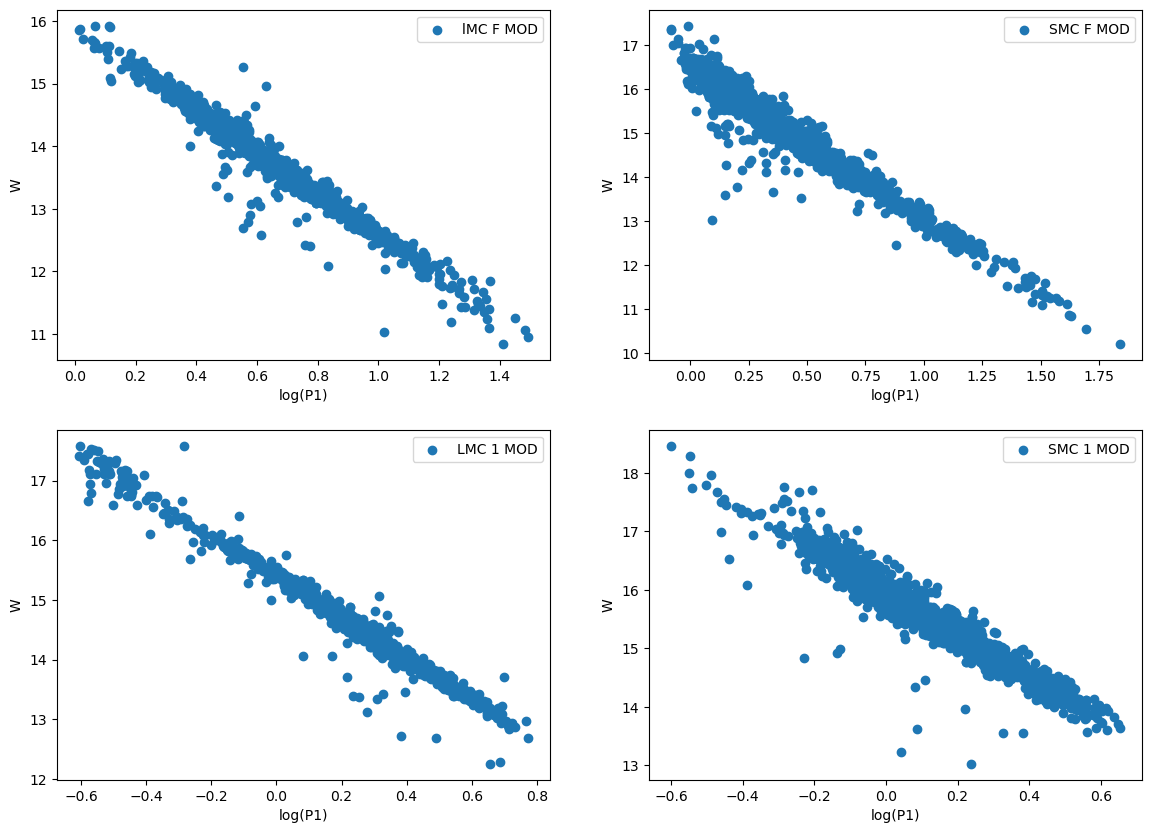

In [54]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(14, 10))

#IMC F Mod plot
ax1.scatter(lmcf['logP1'], lmcf['W'], label='lMC F MOD')
ax1.set(xlabel="log(P1)", ylabel="W")
ax1.legend()

#SMC F Mod plot
ax2.scatter(smcf['logP1'], smcf['W'], label='SMC F MOD')
ax2.set(xlabel="log(P1)", ylabel="W")
ax2.legend()

#IMC 1 Mod plot
ax3.scatter(lmco['logP1'], lmco['W'], label="LMC 1 MOD")
ax3.set(xlabel="log(P1)", ylabel="W")
ax3.legend()

#SMC 1 Mod plot
ax4.scatter(smco['logP1'], smco['W'], label="SMC 1 MOD")
ax4.set(xlabel="log(P1)", ylabel="W")
ax4.legend()

## Part 2: Fit or estimate straight lines to each of the four samples
Note: You can use any fitting function/algorithm you like (i.e. statsmodels, astropy, scipy, numpy, etc..).

In [ ]:
# YOUR CODE HERE

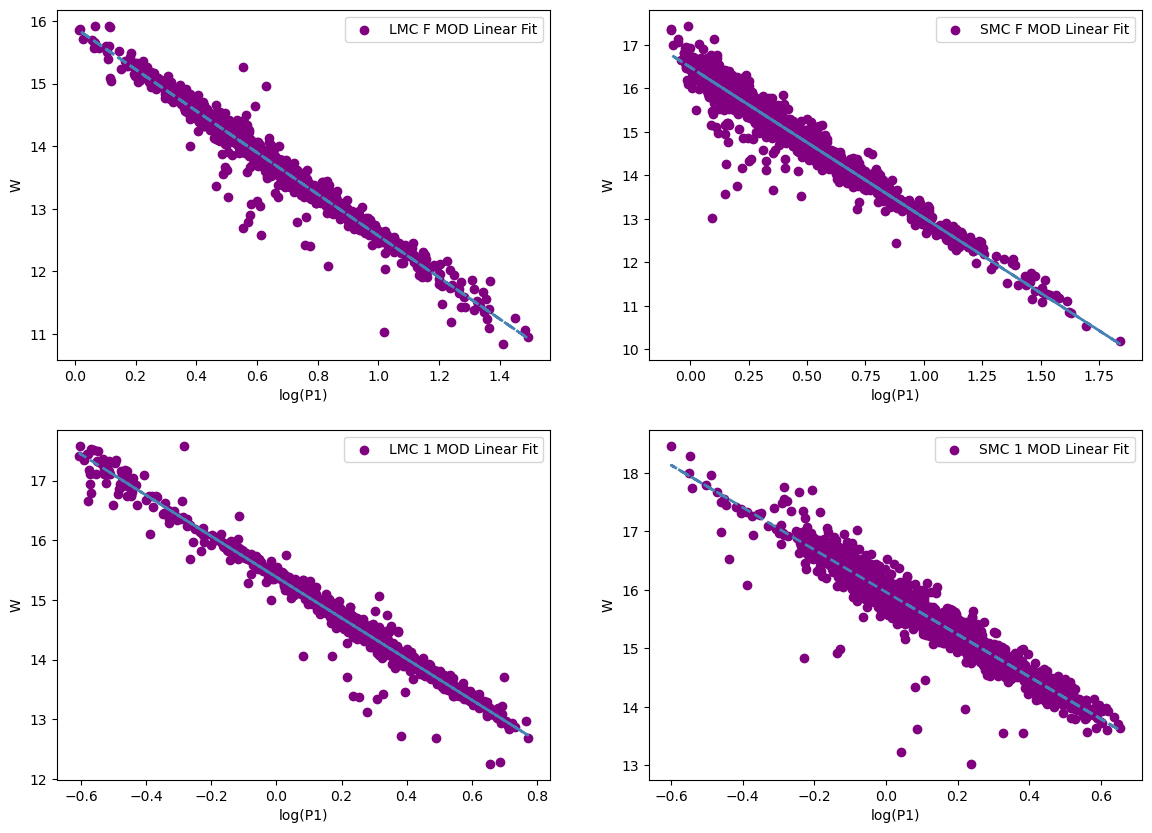

In [55]:
import numpy as np

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

#find line of best fit for LMC F Mod
x = np.array(lmcf['logP1'])
y = np.array(lmcf['W'])

a, b = np.polyfit(x, y, 1)

#add points to plot
axs[0,0].scatter(x, y, color='purple',label="LMC F MOD Linear Fit")
axs[0,0].set(xlabel="log(P1)", ylabel="W")
axs[0,0].legend()

#add line of best fit to plot
axs[0,0].plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#-------------------------------------------------------------------------------------------------------------------------------
#find line of best fit for smc F Mod
x1 = np.array(smcf['logP1'])
y1 = np.array(smcf['W'])

a1, b1 = np.polyfit(x1, y1, 1)

#add points to plot
axs[0,1].scatter(x1, y1, color='purple',label="SMC F MOD Linear Fit")
axs[0,1].set(xlabel="log(P1)", ylabel="W")
axs[0,1].legend()

#add line of best fit to plot
axs[0,1].plot(x1, a1*x1+b1, color='steelblue', linestyle='--', linewidth=2)

#-------------------------------------------------------------------------------------------------------------------------------
#find line of best fit for LMC 1 Mod
x2 = np.array(lmco['logP1'])
y2 = np.array(lmco['W'])

a2, b2 = np.polyfit(x2, y2, 1)

#add points to plot
axs[1,0].scatter(x2, y2, color='purple', label="LMC 1 MOD Linear Fit")
axs[1,0].set(xlabel="log(P1)", ylabel="W")
axs[1,0].legend()

#add line of best fit to plot
axs[1,0].plot(x2, a2*x2+b2, color='steelblue', linestyle='--', linewidth=2)

#-------------------------------------------------------------------------------------------------------------------------------
#find line of best fit for SMC 1 Mod

x3 = np.array(smco['logP1'])
y3 = np.array(smco['W'])

a3, b3 = np.polyfit(x3, y3, 1)

#add points to plot
axs[1,1].scatter(x3, y3, color='purple',label="SMC 1 MOD Linear Fit")
axs[1,1].set(xlabel="log(P1)", ylabel="W")
axs[1,1].legend()

#add line of best fit to plot
axs[1,1].plot(x3, a3*x3+b3, color='steelblue', linestyle='--', linewidth=2)


## Part 3: Compute the residuals of each sample to its respective line.
Do these residuals look like a normal distribution? If not, speculate on why (WATCH THE YOUTUBE VIDEO!)

In [ ]:
# YOUR CODE HERE

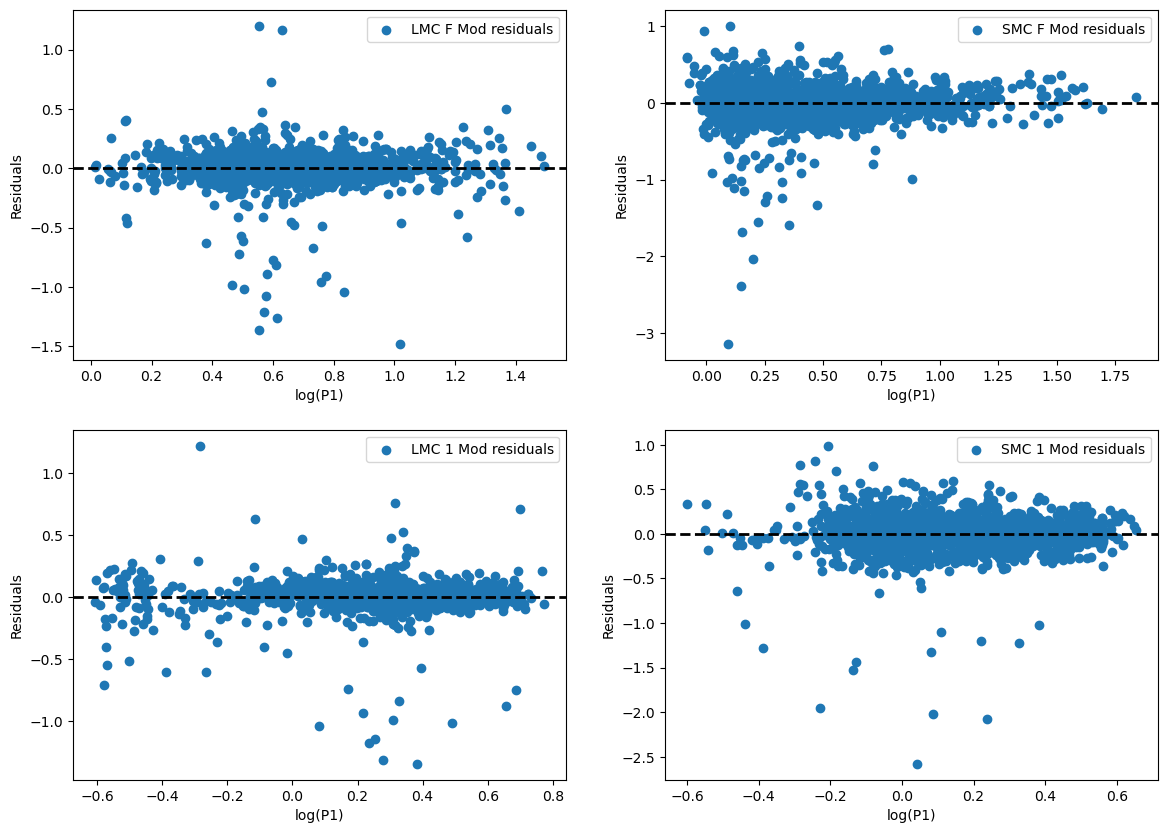

In [105]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(14, 10))

#Residuals of LMCF 
model = np.polyfit(x, y, 1)

#Computing residuals
y_pred = np.polyval(model, x)
residuals = y - y_pred
ax1.scatter(x, residuals, label='LMC F Mod residuals')
ax1.set(xlabel="log(P1)", ylabel='Residuals')
ax1.axhline(y=0, color='black', linestyle='--', linewidth=2)
ax1.legend()

#Residuals of SMCF
model1 = np.polyfit(x1, y1, 1)

#Computing residuals
y1_pred = np.polyval(model1, x1)
residuals1 = y1 - y1_pred
ax2.scatter(x1, residuals1, label='SMC F Mod residuals')
ax2.set(xlabel="log(P1)", ylabel='Residuals')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=2)
ax2.legend()


#Residuals of LMC1
model2 = np.polyfit(x2, y2, 1)

#Computing residuals
y2_pred = np.polyval(model2, x2)
residuals2 = y2 - y2_pred
ax3.scatter(x2, residuals2,label='LMC 1 Mod residuals')
ax3.set(xlabel="log(P1)", ylabel='Residuals')
ax3.axhline(y=0, color='black', linestyle='--', linewidth=2)
ax3.legend()

#Residuals of SMC1
model3 = np.polyfit(x3, y3, 1)

#Computing residuals
y3_pred = np.polyval(model3, x3)
residuals3 = y3 - y3_pred
ax4.scatter(x3, residuals3, label='SMC 1 Mod residuals')
ax4.set(xlabel="log(P1)", ylabel='Residuals')
ax4.axhline(y=0, color='black', linestyle='--', linewidth=2)
ax4.legend()

The residuals of samples doesnt look like a normal distrubtion snice they are not evenly spread above and below the regression line, and this doesn’t change depending on the fitted value (or the X (log(P1)) value). I think that has to do with the fact that Cephide stars are a type of variable stars wiht very well-defined stable periods of changing lumnisity.



## Part 4: Scatter plot of the residuals as RA (x-axis) vs Dec (y-axis) color-coded by whether they are positive or negative.
What do you see?

In [ ]:
# YOUR CODE HERE

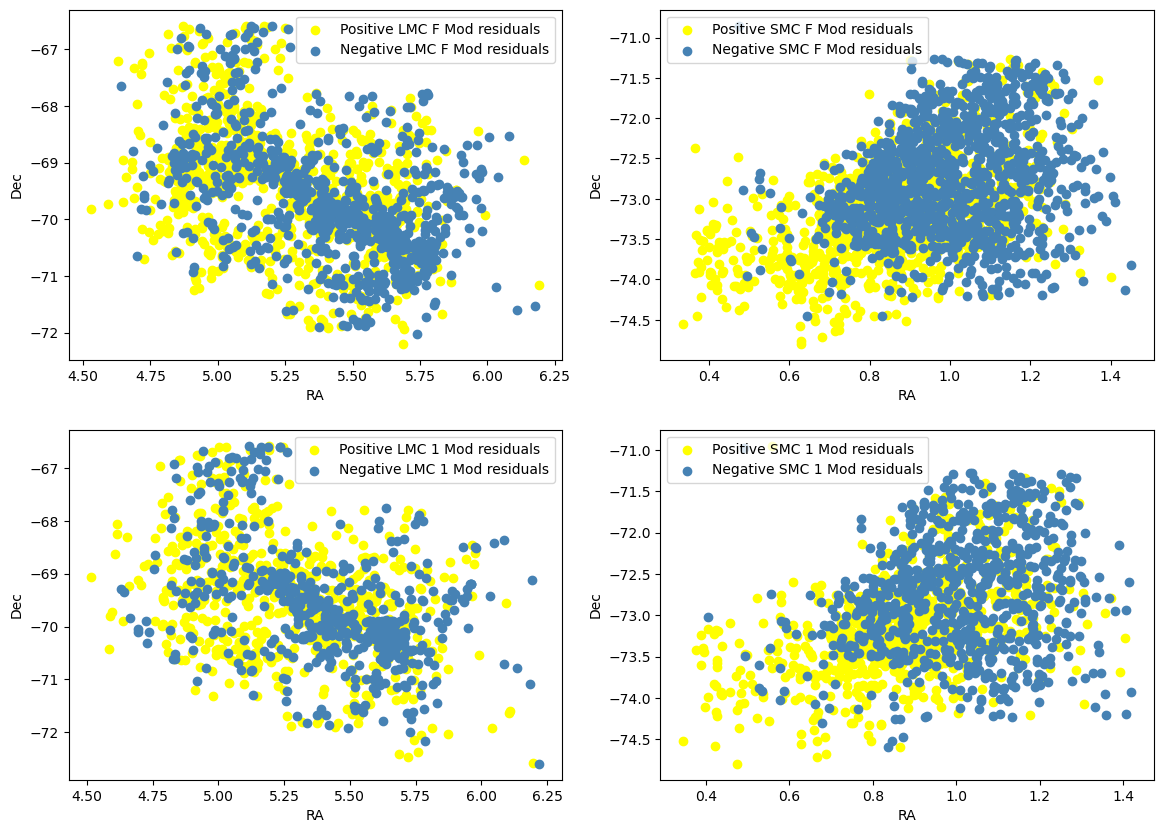

In [106]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(14, 10))


Dec = lmcf['Decl0']
RA = lmcf['RA0']
ax1.scatter(RA[residuals >= 0],Dec[residuals >= 0] ,c='yellow', label='Positive LMC F Mod residuals')
ax1.scatter(RA[residuals < 0],Dec[residuals < 0] ,c='steelblue',label='Negative LMC F Mod residuals')
ax1.set(xlabel="RA", ylabel='Dec')
ax1.legend()

Dec1 = smcf['Decl0']
RA1 = smcf['RA0']
ax2.scatter(RA1[residuals1 >= 0],Dec1[residuals1 >= 0] ,c='yellow', label='Positive SMC F Mod residuals')
ax2.scatter(RA1[residuals1 < 0],Dec1[residuals1 < 0] ,c='steelblue',label='Negative SMC F Mod residuals')
ax2.set(xlabel="RA", ylabel='Dec')
ax2.legend()

Dec2 = lmco['Decl0']
RA2 = lmco['RA0']
ax3.scatter(RA2[residuals2 >= 0],Dec2[residuals2 >= 0] ,c='yellow', label='Positive LMC 1 Mod residuals')
ax3.scatter(RA2[residuals2 < 0],Dec2[residuals2 < 0] ,c='steelblue',label='Negative LMC 1 Mod residuals')
ax3.set(xlabel="RA", ylabel='Dec')
ax3.legend()

Dec3 = smco['Decl0']
RA3 = smco['RA0']
ax4.scatter(RA3[residuals3 >= 0],Dec3[residuals3 >= 0] ,c='yellow', label='Positive SMC 1 Mod residuals')
ax4.scatter(RA3[residuals3 < 0],Dec3[residuals3 < 0] ,c='steelblue',label='Negative SMC 1 Mod residuals')
ax4.set(xlabel="RA", ylabel='Dec')
ax4.legend()

I see that there are more positive and negative residuals in F Mod for two different data sets (LMC and SMC).